In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn import utils

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


In [4]:
dia_data=pd.read_csv('../input/diabetes/diabetes.csv')
dia_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dia_data.isnull().sum()
dia_data.describe()
dia_data.isnull().sum()
## data showing min values as 0.. Is this Even Possibe??
# no Creatinag a copy of data and replacing the 0 with Nan

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [6]:
dta=dia_data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age"]].replace(0,np.NaN)
dta.isnull().sum()
## Now we can clearly see the empty values in the data so to obercome this problem.. lets fill these NaN values
## with their mean
dta["Pregnancies"].fillna(dta["Pregnancies"].mean(),inplace=True)
dta["Glucose"].fillna(dta["Glucose"].mean(),inplace=True)
dta["BloodPressure"].fillna(dta["BloodPressure"].mean(),inplace=True)
dta["BMI"].fillna(dta["BMI"].mean(),inplace=True)
dta["SkinThickness"].fillna(dta["SkinThickness"].mean(),inplace=True)
dta["Insulin"].fillna(dta["Insulin"].mean(),inplace=True)
dta.isnull().sum()


Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
dtype: int64

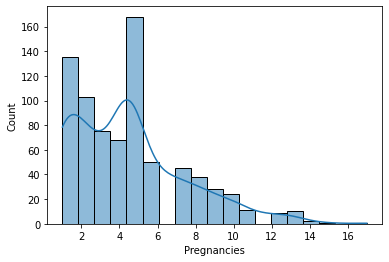

In [7]:
a=sns.histplot(data=dta, x="Pregnancies",kde=True)

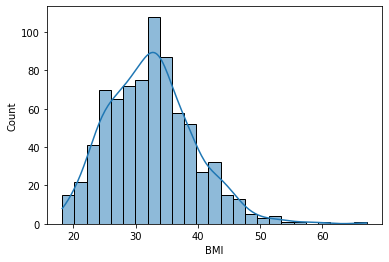

In [8]:
b=sns.histplot(data=dta,x="BMI",kde=True)

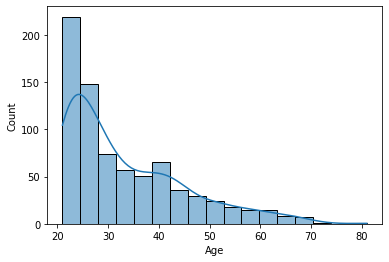

In [9]:
b=sns.histplot(data=dta,x="Age",kde=True)

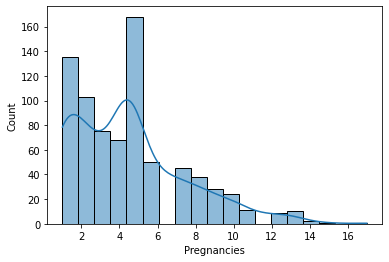

In [10]:
## Since we can see skewness is present in the data ie Positive skewness
# Since the skness is +ve, The model base will work definitely fine for smaller values
## Hence we need to normalize the skewness to have a better working mpodel

#applying log transform
# dta["Age"]=np.log(dta["Age"])
#Apply Box-coxs from scipy
# dta["Age"]=stats.boxcox(dta["Age"])[0]
# Applying sqroot transform-- Gives best result
dta["Age"]=np.sqrt(dta["Age"])
sns.histplot(data=dta,x="Pregnancies",kde=True)
dta["BMI"]=np.sqrt(dta["BMI"])
# no neeed to change the skew of the pregenancies as it os well defined in its domain..

In [11]:
dta

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.000000,148.0,72.0,35.00000,155.548223,5.796551,7.071068
1,1.000000,85.0,66.0,29.00000,155.548223,5.157519,5.567764
2,8.000000,183.0,64.0,29.15342,155.548223,4.827007,5.656854
3,1.000000,89.0,66.0,23.00000,94.000000,5.300943,4.582576
4,4.494673,137.0,40.0,35.00000,168.000000,6.565059,5.744563
...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,5.735852,7.937254
764,2.000000,122.0,70.0,27.00000,155.548223,6.066300,5.196152
765,5.000000,121.0,72.0,23.00000,112.000000,5.118594,5.477226
766,1.000000,126.0,60.0,29.15342,155.548223,5.486347,6.855655


In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(dta),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,5.062549e-01,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.219121,1.442365
1,-1.175289e+00,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.851976,-0.121795
2,1.178873e+00,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.405954,-0.029098
3,-1.175289e+00,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.611579,-1.146865
4,2.987023e-16,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.507237,0.062161


In [13]:
y=dia_data[["Outcome"]]
X=dta[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

In [14]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target((y_train).astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1
 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [15]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

print(max( train_scores),i)
print(max( test_scores),i)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

1.0 29
0.73828125 29


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [16]:
max_train_score=max(train_scores)
train_ind = [i for i,v in enumerate(train_scores) if v==max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_ind))))

Max train score 100.0 % and k = [1]


In [17]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 73.828125 % and k = [12]


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


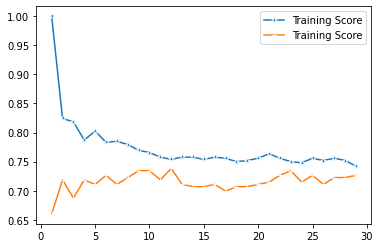

In [18]:
p=sns.lineplot(range(1,30),train_scores,marker="*",label="Training Score")
p=sns.lineplot(range(1,30),test_scores,marker="+",label="Training Score")

In [25]:
knn=KNeighborsClassifier(12)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.73828125

# PERFORMANCE ANALYSIS

In [29]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[149,  21],
       [ 46,  40]])

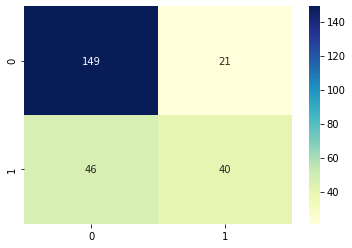

In [30]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       170
           1       0.66      0.47      0.54        86

    accuracy                           0.74       256
   macro avg       0.71      0.67      0.68       256
weighted avg       0.73      0.74      0.72       256



In [33]:


from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)



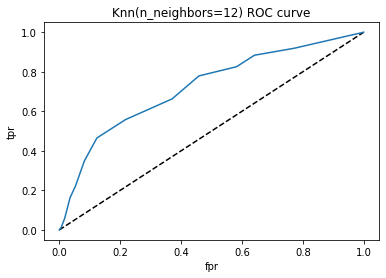

In [35]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=12) ROC curve')
plt.show()

